# 911 Calls - Descriptive Analytics Project
*Description: Emergency (911) Calls: Fire, Traffic, EMS for Montgomery County, PA.*

For this descriptive analytics project I will be analyzing **911 Calls** dataset from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).<br>The 911 Calls data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## 1. Importing Libraries and Loading Data

In [500]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
%matplotlib inline

In [501]:
# Loading 911 calls dataset
path = 'D:\Simon\___My Projects\Python - 911 Calls - DataViz'
path_to_file = (path + '\911.csv')
df = pd.read_csv(path_to_file)

In [502]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## 2. Exploratory Analysis and Data Cleaning

First let's check the percentage of NAN values in all columns.

In [503]:
round((df.isna().sum() / df.count()) * 100, 1)

lat           0.0
lng           0.0
desc          0.0
zip          14.8
title         0.0
timeStamp     0.0
twp           0.0
addr          0.5
e             0.0
dtype: float64

Most of the columns have no NAN values, except for **'zip code'**, **'township'** and **'address'**. <br>However, only **zip code** has a significant amount of NANs - 14.8% of all values.

In [504]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


Zip code is numeric type, we should convert it to strings.<br>
The dummy variable column 'e' is always 1 so we can remove it.

In [505]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


Timestamp column contains strings, we should convert it to datetime type.<br>
It will also be useful to create some more date columns from it: year, month, date, weekday, hour.

### Results of Exploratory Analysis
**1. Cleaning the dataset**
    - Remove dummy variable column 'e' 
    - Change type of timeStamp to date
**2. Creating new variables**
    - Create type and subtype columns based on the title column
    - Create Year, Month, Date and Hour columns from the timestemp column    

In [506]:
# Remove dummy variable 'e'
df = df.drop(['e'], axis = 1, errors = 'ignore')
# change type of timestamp
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

# create type and subtype columns
df['Type'] = df['title'].apply(lambda x: x.split(':')[0])
df['Suptype'] = df['title'].apply(lambda x: x.split(':')[1])
# create Year, Month, Date, Day of Week and Hour columns
df['Year'] = df['timeStamp'].apply(lambda x: x.year)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
days = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
df['Weekday'] = df['timeStamp'].apply(lambda x: days[x.dayofweek])
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)

## 3. Descriptive Analysis

### 911 Calls by Type

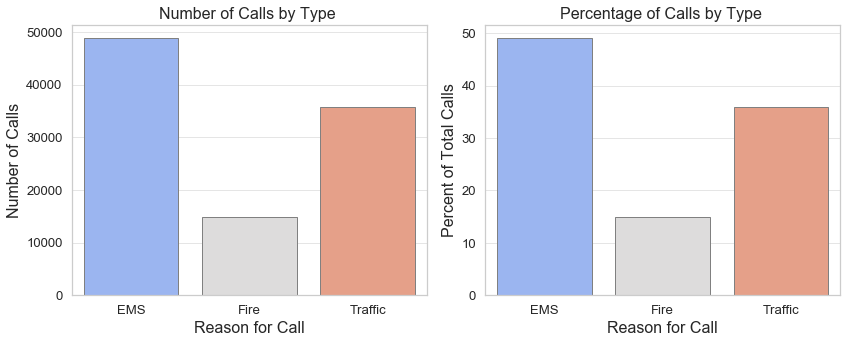

In [507]:
# set plot size, gridline width, style, font scale, ...
sns.set(rc={'figure.figsize':(12,5), "grid.linewidth": 0.5}, style="whitegrid", font_scale=1.2)
# plotting two graphs
fig, (ax1, ax2) = plt.subplots(ncols=2)
sns.countplot(x = 'Type', data = df, palette = 'coolwarm', lw = 1, edgecolor = 'gray', ax = ax1)
sns.barplot(x = "Type", y = "lat", data = df, estimator = lambda x: len(x) / len(df) * 100, ax = ax2,
           lw = 1, edgecolor = 'gray', palette = 'coolwarm')

# set axis and title for ax1
ax1.set_xlabel("Reason for Call",fontsize=16)
ax1.set_ylabel("Number of Calls",fontsize=16)
ax1.set_title("Number of Calls by Type ",fontsize=16)

# set axis and title for ax2
ax2.set_xlabel("Reason for Call",fontsize=16)
ax2.set_ylabel("Percent of Total Calls",fontsize=16)
ax2.set_title("Percentage of Calls by Type ",fontsize=16)

plt.tight_layout()

- Almost 50% of all 911 Calls are Emergency calls.
- Trafic come second with over 35%.

### 911 Calls by Day of Week

No handles with labels found to put in legend.


Text(0.5, 1.0, 'EMS Calls by Day of Week')

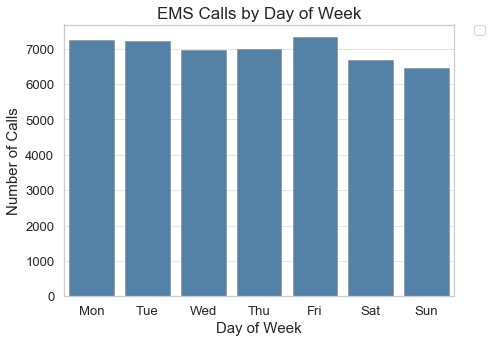

In [508]:
sns.set(rc={'figure.figsize':(7,5), "grid.linewidth": 0.5}, style="whitegrid", font_scale=1.2)

# Countplot + move legend + change: colors + borders + titles + figure size
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

#sns.set_style("whitegrid") # changing figure style
#sns.set_context('notebook', font_scale = 1.2)
sns.countplot(x = 'Weekday', data = df[df['Type'] == 'EMS'], 
             lw = .5, edgecolor = 'gray', order = order, color = 'steelblue')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # moving legend outsude of the plot
plt.ylabel('Number of Calls', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.title('EMS Calls by Day of Week', fontsize = 17)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Fire Calls by Day of Week')

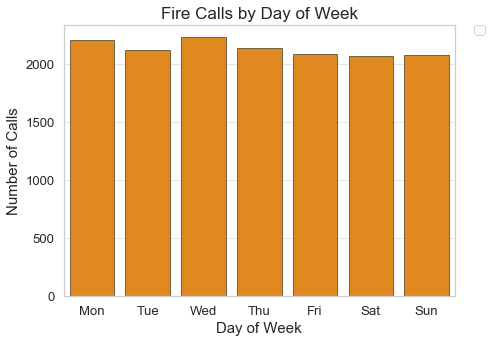

In [509]:
sns.set(rc={'figure.figsize':(7,5), "grid.linewidth": 0.5}, style="whitegrid", font_scale=1.2)

# Countplot + move legend + change: colors + borders + titles + figure size
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

#sns.set_style("whitegrid") # changing figure style
#sns.set_context('notebook', font_scale = 1.2)
sns.countplot(x = 'Weekday', data = df[df['Type'] == 'Fire'], 
             lw = .5, edgecolor = 'black', order = order, color = 'darkorange')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # moving legend outsude of the plot
plt.ylabel('Number of Calls', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.title('Fire Calls by Day of Week', fontsize = 17)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Traffic Calls by Day of Week')

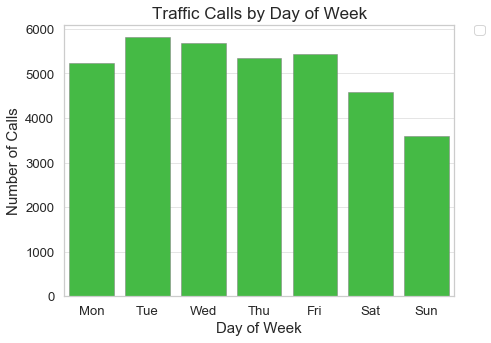

In [510]:
sns.set(rc={'figure.figsize':(7,5), "grid.linewidth": 0.5}, style="whitegrid", font_scale=1.2)

# Countplot + move legend + change: colors + borders + titles + figure size
order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

#sns.set_style("whitegrid") # changing figure style
#sns.set_context('notebook', font_scale = 1.2)
sns.countplot(x = 'Weekday', data = df[df['Type'] == 'Traffic'], 
             lw = .5, edgecolor = 'gray', order = order, color = 'limegreen')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # moving legend outsude of the plot
plt.ylabel('Number of Calls', fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
plt.title('Traffic Calls by Day of Week', fontsize = 17)

- Emergency and Traffic calls have a significant drop on weekends.
- Friday is the most busy day with Emergency calls.
- Most Traffic 911 calls happen on Tuesdays and Wednsdays.

### 911 Calls by Month

Text(0.5, 1.0, 'Number of 911 Calls by Month')

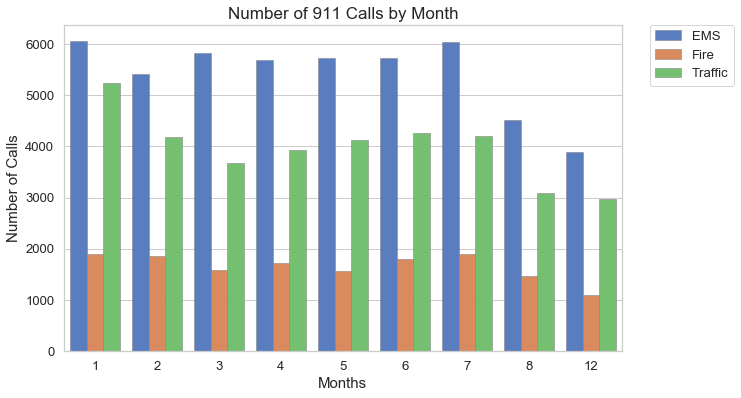

In [511]:
# Countplot + move legend + change: colors + borders + titles + figure size
sns.set_style("whitegrid") # changing figure style
sns.set_context('notebook', font_scale = 1.2)
plt.figure(figsize = (10,6)) # changing size - has to be before plot function
sns.countplot(x = 'Month', data = df, hue = 'Type', palette = 'muted',
             lw=.5, edgecolor = 'gray')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # moving legend outsude of the plot
plt.ylabel('Number of Calls', fontsize=15)
plt.xlabel('Months', fontsize=15)
plt.title('Number of 911 Calls by Month', fontsize = 17)

Text(0.5, 1, 'Number of 911 Calls by Month')

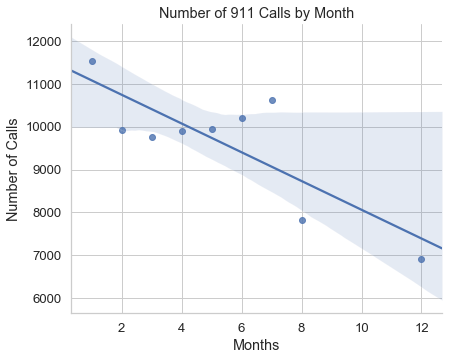

In [512]:
df_m = df.groupby('Month').count()
df_m.reset_index(inplace = True)
g = sns.lmplot(data = df_m, y = 'zip', x = 'Month')
g.fig.set_size_inches(7,5)
# labels
plt.xlabel('Months')
plt.ylabel('Number of Calls')
plt.title('Number of 911 Calls by Month')

It seems like the number of calls goes down in the second half of the year, however there is not enough data to be confident about this assumption.

### 911 Calls by Date

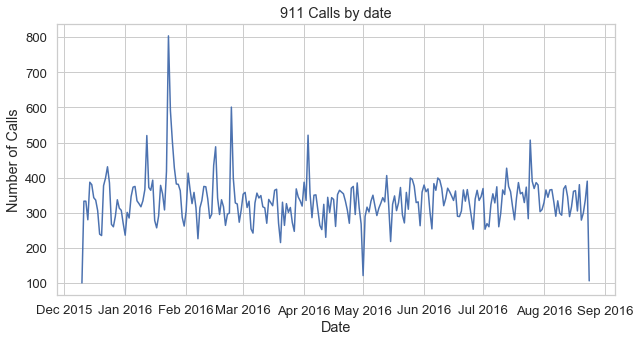

In [513]:
# preparing data
df_d = df.groupby('Date').count()
df_d.reset_index(inplace = True)
# plotting
fig, ax = plt.subplots(figsize = (10,5)) 
fig = sns.lineplot(data = df_d, x = 'Date', y = 'zip')
# set title and lables for axes
ax.set(xlabel="Date", ylabel="Number of Calls", title="911 Calls by date")
# set appropriate date format
date_form = DateFormatter("%b %Y")
ax.xaxis.set_major_formatter(date_form)

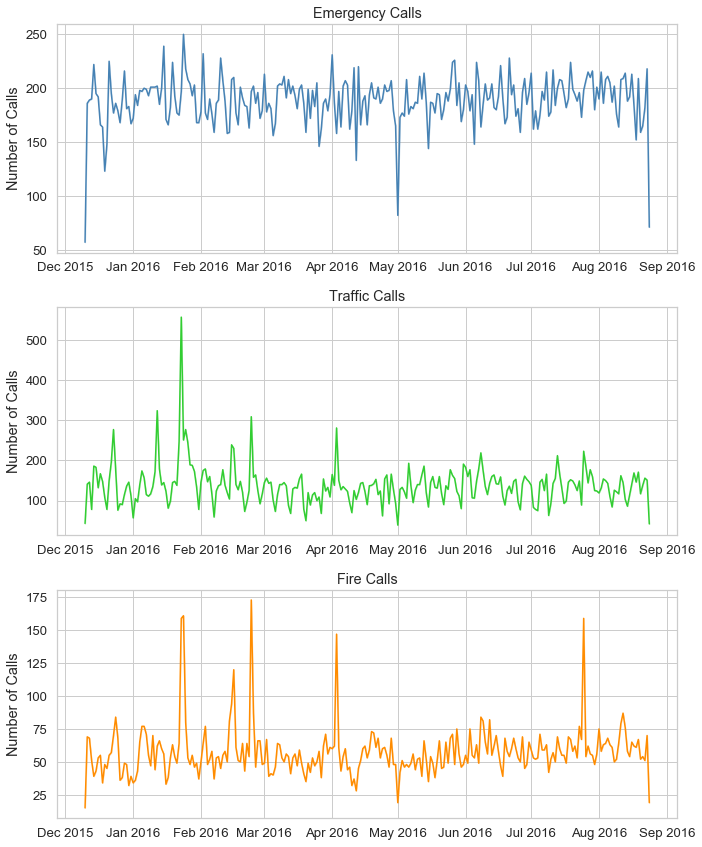

In [514]:
# plotting
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
sns.lineplot(data = df[df['Type'] == 'EMS'], x = 'Date', y = 'lat', estimator = lambda x: len(x), color = 'steelblue', ax = ax1)
sns.lineplot(data = df[df['Type'] == 'Traffic'], x = 'Date', y = 'lat', estimator = lambda x: len(x), color = 'limegreen', ax = ax2)
sns.lineplot(data = df[df['Type'] == 'Fire'], x = 'Date', y = 'lat', estimator = lambda x: len(x), color = 'darkorange', ax = ax3)
# axis
ax1.set(xlabel="", ylabel="Number of Calls", title="Emergency Calls")
ax2.set(xlabel="", ylabel="Number of Calls", title="Traffic Calls")
ax3.set(xlabel="", ylabel="Number of Calls", title="Fire Calls")
# set appropriate date format
date_form = DateFormatter("%b %Y")
ax1.xaxis.set_major_formatter(date_form)
ax2.xaxis.set_major_formatter(date_form)
ax3.xaxis.set_major_formatter(date_form)
plt.tight_layout()

- Total calls by each Type seem to have a significant random variaton during the year, with no meaninful trends.
- Emergency calls data has outlier dates with far less calls then usual.
- At the same time, Fire and Traffic data has noticeable ourliers with much higher volume of 911 calls.

### 911 Calls by Hour and Day of Week

Text(0.5, 1, 'Heatmap of 911 Calls')

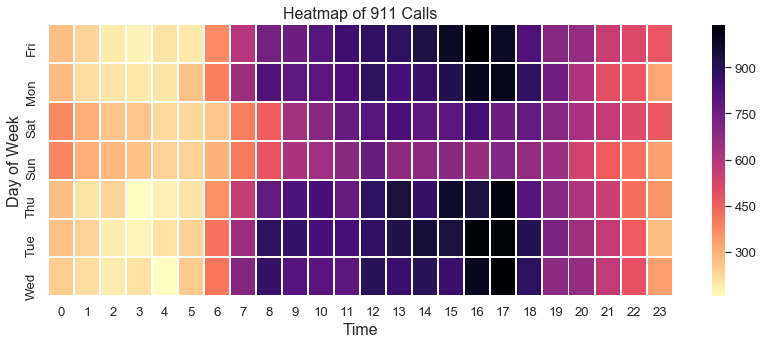

In [515]:
df_m = df.pivot_table(index = 'Weekday', columns = 'Hour', values = 'lat',
                      aggfunc = 'count')
fig, ax = plt.subplots(figsize = (14,5))
fig = sns.heatmap(df_m, linecolor = 'white', lw = 1, cmap = 'magma_r')
ax.set_xlabel("Time",fontsize=16)
ax.set_ylabel("Day of Week",fontsize=16)
ax.set_title("Heatmap of 911 Calls",fontsize=16)

- Most 911 calls happen during daytime, with the highest concentration at 3-5 pm.

### Mapping 911 Calls

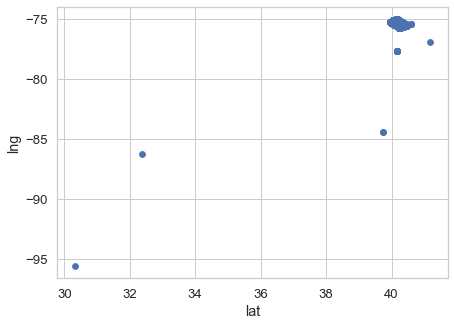

In [516]:
sns.scatterplot(x = 'lat', y = 'lng', data = df, edgecolor = None)

A few locations are outliers. By removing them we can take a better look at the majority of calls.

In [517]:
df_map = df[(df['lat'] > 38) & (df['lng'] > -76) & (df['lat'] < 40.5)]
(len(df) - len(df_map)) / len(df) * 100

0.019097012825151773

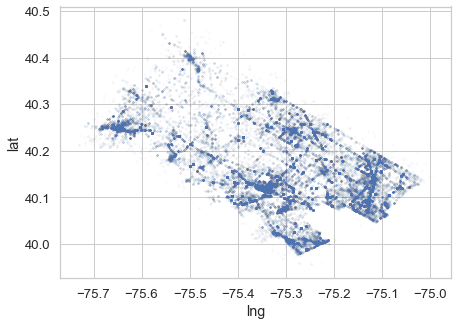

In [518]:
df_map = df[(df['lat'] > 38) & (df['lng'] > -76) & (df['lat'] < 40.5)]
sns.scatterplot(x = 'lng', y = 'lat', data = df_map, edgecolor = None, alpha = 0.02, s = 3)

By removing just 19 observations (less than 0.02% of the data) we now can take a much better look at the locations of 911 Calls.<br>
Now let's upload a map image and plot 911 calls on the map.

In [519]:
# Uploading map image
path_to_file = (path + '\map.png')
image = plt.imread(path_to_file)
im_h = image.shape[0]
im_w = image.shape[1]
image.shape

(1116, 1199, 4)

In [520]:
# setting limits for the map
BBox = (round(df_map['lng'].min(),2), round(df_map['lng'].max(),2),      
        round(df_map['lat'].min(),2), round(df_map['lat'].max(),2))
BBox

(-75.73, -75.0, 39.96, 40.48)

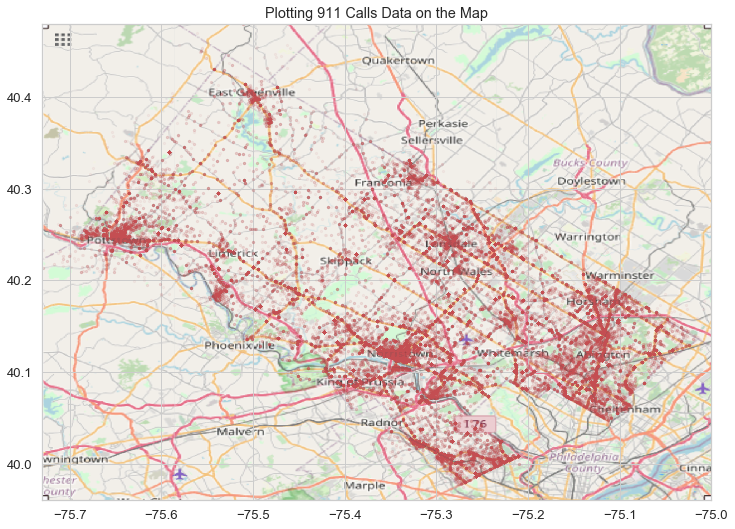

In [521]:
# plotting
fig, ax = plt.subplots(figsize = (im_w/100, im_h/100))
ax.scatter(df['lng'], df['lat'], zorder=1, alpha= 0.05, c='r', s=5)
ax.set_title('Plotting 911 Calls Data on the Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(image, zorder=0, extent = BBox, aspect= 'equal')

- The highest concentration of 911 Calls happens in the towns, like Norristown, Pottstown, Abington and Horsham.

Let's check this conclusion buy plotting the number of 911 Calls by Townships.

Text(0.5, 1.02, 'Number of 911 Calls by township')

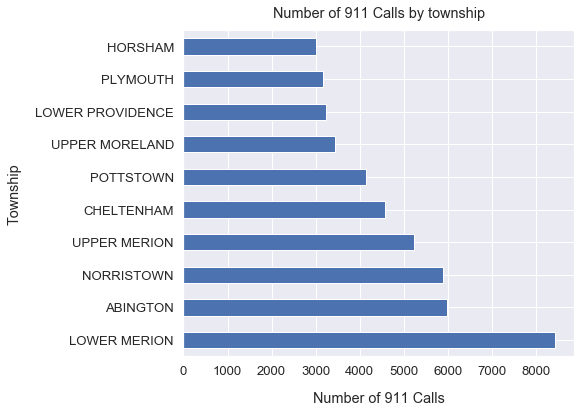

In [522]:
sns.set(font_scale = 1.2)
df['twp'].value_counts().head(10).plot(kind='barh', figsize=(7, 6), rot=0)
plt.xlabel("Number of 911 Calls", labelpad=14)
plt.ylabel("Township", labelpad=14)
plt.title("Number of 911 Calls by township", y=1.02)

- All 4 towns that seemed to have most 911 Calls from the map are actually in Top10 towns by the number of calls.

Text(0.5, 1.02, 'Percentage of Total 911 Calls by township')

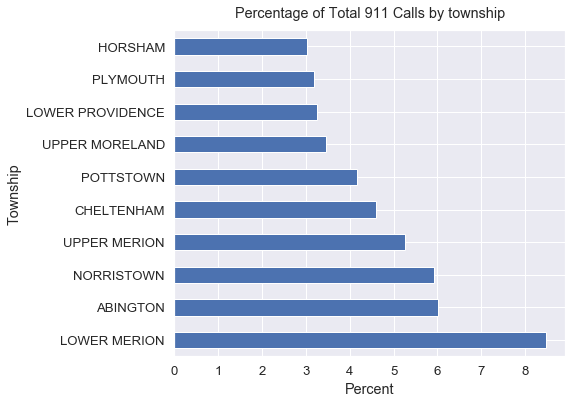

In [523]:
df_temp = df['twp'].value_counts().head(10) / len(df) * 100
df_temp.plot(kind='barh', figsize=(7, 6), rot=0)
plt.xlabel("Percent", labelpad=5)
plt.ylabel("Township", labelpad=5)
plt.title("Percentage of Total 911 Calls by township", y=1.02)

In [524]:
sum(df['twp'].value_counts().head(10) / len(df)) * 100

47.31837735697343

- Top 10 townships make up 47% of Total 911 Calls in Mobtgomery County, PA.

## 4. Final Insights from the Analysis:

- Almost 50% of all 911 Calls are Emergency calls.
- Trafic come second with over 35%.
- Emergency and Traffic calls have a significant drop on weekends.
- Friday is the most busy day with Emergency calls.
- Most Traffic 911 calls happen on Tuesdays and Wednsdays.
- Total calls by each Type seem to have a significant random variaton during the year, with no meaninful trends.
- Emergency calls data has outlier dates with far less calls then usual.
- At the same time, Fire and Traffic data has noticeable ourliers with much higher volume of 911 calls.
- Most 911 calls happen during daytime, with the highest concentration at 3-5 pm.
- Top 10 townships make up 47% of Total 911 Calls in Mobtgomery County, PA.